In [228]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
%matplotlib inline

In [120]:
url = 'https://raw.githubusercontent.com/Kkies/movie-market-analysis/kyle_wip/movies_and_crew.csv'
m_c = pd.read_csv(url)

In [121]:
# drop columns 
# m_c.drop(columns=['Unnamed: 0', 'title'], inplace = True)

In [122]:
url = 'https://raw.githubusercontent.com/Kkies/movie-market-analysis/kyle_wip/movies_budget_revenue.csv'
b_r = pd.read_csv(url)

In [124]:
# drop columns 
# b_r.drop(columns = ['Unnamed: 0', 'year', 'date_published', 'genre', 'duration', 'country',
#                    'language', 'actors', 'description'], inplace = True)

In [125]:
new = m_c.merge(b_r[['imdb_title_id', 'usa_gross_income']], how='left', left_on='imdb_title_id', right_on='imdb_title_id')

In [126]:
# new['usa_gross_income'].i
# new.dropna(axis='index', inplace=True)

In [128]:
new.groupby(by='imdb_name_id')['usa_gross_income'].agg(['sum', 'count', 'mean']).sort_values('count', ascending=False)

,sum,count,mean
imdb_name_id,,,
nm0000552,2.058463e+09,19,1.083402e+08
nm0000158,1.658994e+09,17,9.758791e+07
nm0005428,9.176379e+08,17,5.397870e+07
nm0006133,1.265434e+09,16,7.908961e+07
nm0000142,7.889338e+08,16,4.930836e+07
...,...,...,...
nm0627574,0.000000e+00,0,NaN
nm0627581,0.000000e+00,0,NaN
nm0627604,0.000000e+00,0,NaN


In [129]:
name_df.head()

,,sum,count,mean
imdb_name_id,category,,,
nm0002354,composer,2.448783e+09,8,3.060978e+08
nm0005086,producer,1.060102e+09,5,2.120205e+08
nm0453091,producer,8.886227e+08,5,1.777245e+08
nm0000204,actress,1.395634e+09,8,1.744542e+08
nm0000988,producer,1.123486e+09,7,1.604980e+08


In [207]:
name_df = new.groupby(by=['imdb_name_id', 'category'])['usa_gross_income'].agg(['sum', 'count', 'mean']).sort_values('mean')

In [208]:
name_df = name_df[name_df['count'] > 4].sort_values(by='mean')

In [209]:
name_df.shape

(261, 3)

In [210]:
total = name_df.merge(m_c[['name', 'category', 'imdb_name_id']], how='left', left_on='imdb_name_id', right_on='imdb_name_id')

In [211]:
total.drop_duplicates(inplace=True)

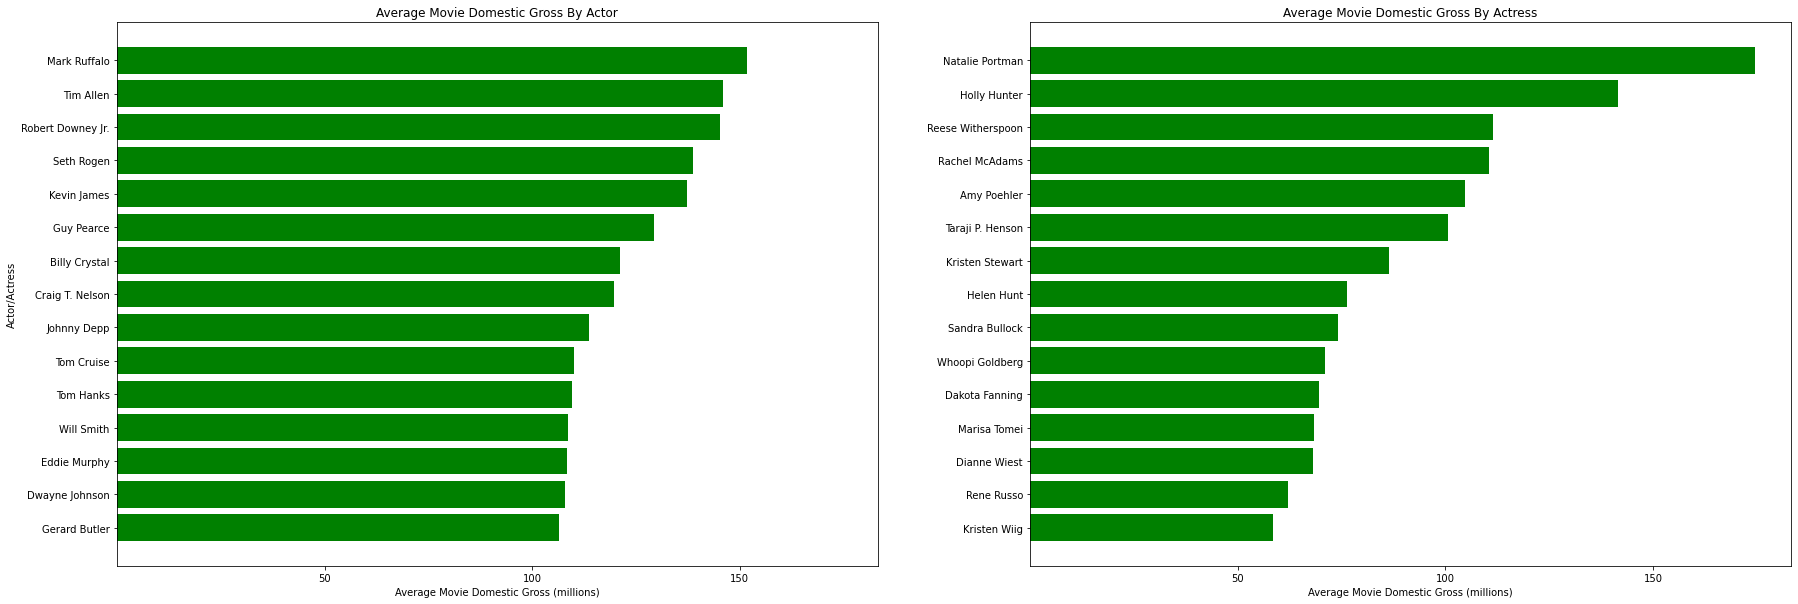

In [234]:
fig, (ax1, ax2) = plt.subplots(1,2, sharex=True, figsize=(30,10))

x = total.query("category == 'actor'")['name'].tail(15)
y = total.query("category == 'actor'")['mean'].tail(15)
ax1.set_title('Actors to Scout For')
ax1.barh(x, y, color='g')

a = total.query("category == 'actress'")['name'].tail(15)
b = total.query("category == 'actress'")['mean'].tail(15)
ax2.set_title('Actresses to Scout For')
ax2.barh(a, b, color='g')

ax1.set_xlabel('Average Movie Domestic Gross (millions)')
ax1.set_title('Average Movie Domestic Gross By Actor')
ax2.set_title('Average Movie Domestic Gross By Actress')
ax2.set_xlabel('Average Movie Domestic Gross (millions)')
ax1.set_ylabel('Actor/Actress')
ax1.set_xticks(np.linspace(50_000_000, 150_000_000, num=3))
ax2.set_xticklabels([50,100,150])
plt.show();

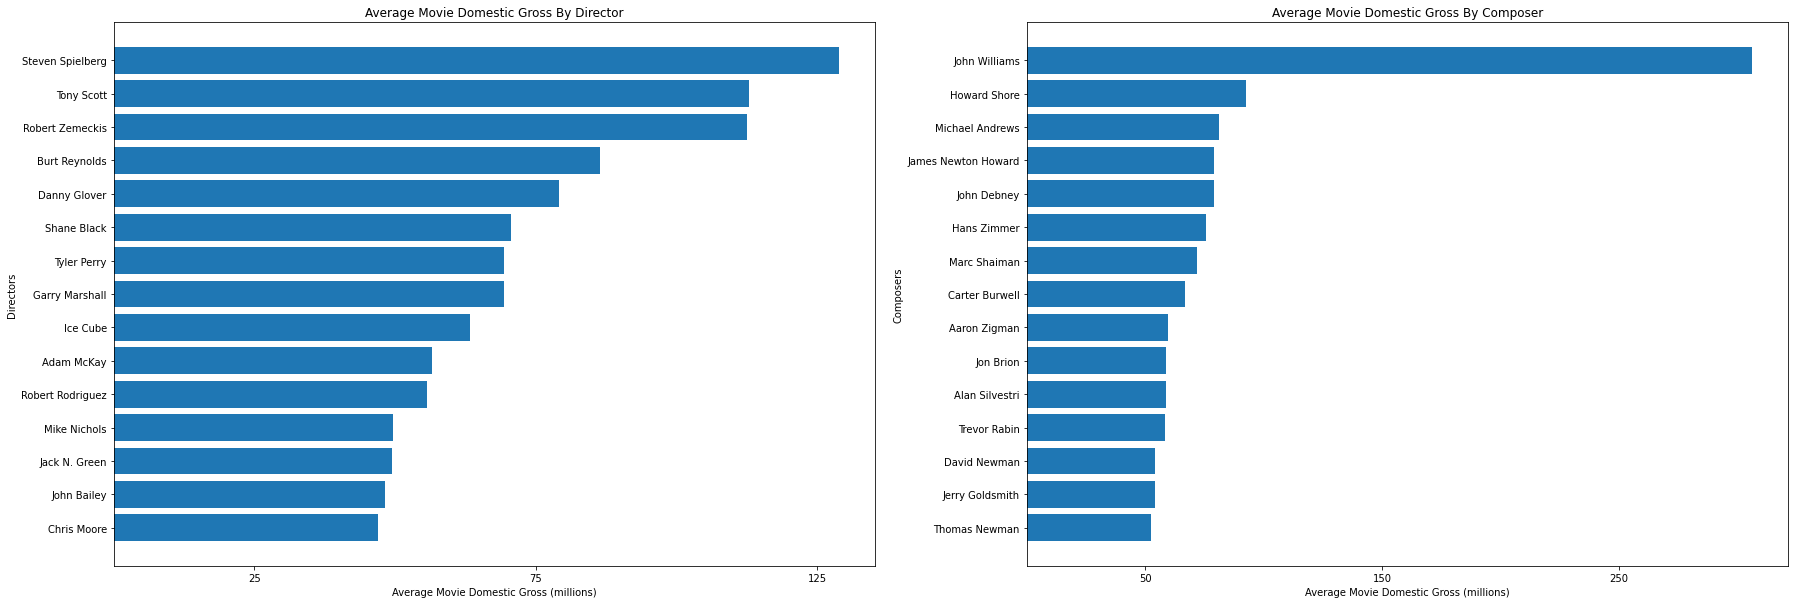

In [247]:
fig1, (ax3, ax4) = plt.subplots(1,2, figsize=(30,10))

i = total.query("category == 'director'")['name'].tail(15)
j = total.query("category == 'director'")['mean'].tail(15)
ax3.set_title('Directors')
ax3.barh(i,j)


f = total.query("category == 'composer'")['name'].tail(15)
g = total.query("category == 'composer'")['mean'].tail(15)
ax4.set_title('Composers')
ax4.barh(f,g)


ax3.set_xlabel('Average Movie Domestic Gross (millions)')
ax3.set_title('Average Movie Domestic Gross By Director')
ax4.set_title('Average Movie Domestic Gross By Composer')
ax4.set_xlabel('Average Movie Domestic Gross (millions)')
ax3.set_ylabel('Directors')
ax4.set_ylabel('Composers')
ax3.set_xticks(np.linspace(25_000_000, 125_000_000, num=3))
ax3.set_xticklabels([25,75,125])
ax4.set_xticks(np.linspace(50_000_000, 250_000_000, num=3))
ax4.set_xticklabels([50, 150, 250])
plt.show();